## Movie Recommender System - Part 1(Movie Segmentation)

### 0. Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset :

In [3]:
#Reading the movies data
movies = pd.read_csv("datasets/movies.csv")

In [4]:
movies.sample(2)

,movieId,title,genres
5684,27722,Last Life in the Universe (Ruang rak noi nid m...,Drama|Romance
5714,27831,Layer Cake (2004),Crime|Drama|Thriller


### 2. Data Preparation :  
#### 2.1 Identifying list of unique genres


In [8]:
g = "Children|Comedy"
g.split("|")

['Children', 'Comedy']

In [9]:
genres_list = []
for genre in movies['genres'] :
    genre_splitted = genre.split('|')
    for item in genre_splitted :
        if item not in genres_list :
            genres_list.append(item)
            
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


#### 2.2 Creating individual column for each genre

In [10]:
#Initial values is set to zero for all new columns
for genre in genres_list :
    movies[genre] = 0
    
movies.sample(2)

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
9005,140038,Madly in Love (1981),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6521,53996,Transformers (2007),Action|Sci-Fi|Thriller|IMAX,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.3 Using indicator to indicate presence of genre 

In [12]:
# Movie[movie, Genre] = 1, if Genre is present in movie

for index , row in movies.iterrows() :
    for current_genre in genres_list :
        if current_genre in row['genres'] :
            movies.loc[index, current_genre] = 1

In [13]:
movies.sample(5)

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
2964,3973,Book of Shadows: Blair Witch 2 (2000),Crime|Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
8202,103341,"World's End, The (2013)",Action|Comedy|Sci-Fi,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5550,26686,Ghost Dad (1990),Comedy|Fantasy,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7575,86028,Henry's Crime (2010),Comedy|Crime,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7901,95145,Dragon Ball: The Curse Of The Blood Rubies (Do...,Action|Adventure|Animation|Children,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Movie Segmentation
#### 3.1 Data preparation for clustering

In [14]:
#Drop the columns MovieID, title and Genres
#Select every other (binary) columns

movies_sub = movies.iloc[:,3:]
movies_sub.sample(2)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
6999,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
412,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


#### 3.2 Agglomerative Clustering(with cosine similarity and complete linkage)

In [15]:
#Packages
import sklearn
from sklearn.cluster import AgglomerativeClustering

#Dendrogram
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
#Plotting dendrogram
Z = linkage(movies_sub, 'complete')
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.show()

KeyboardInterrupt: 

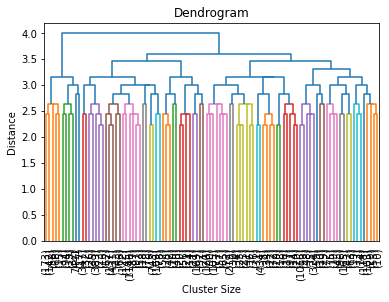

In [18]:
#Truncated Dendrogram
Z = linkage(movies_sub, 'complete')
dendrogram(Z,truncate_mode='lastp',p=100,leaf_rotation=90, leaf_font_size=10.)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.show()

In [19]:
#Agglomerative hiearchial Clustering
hclust = AgglomerativeClustering(n_clusters = 10, affinity = 'cosine', linkage = 'complete')

In [20]:
hclust.fit(movies_sub)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=10)

In [21]:
#Adding the cluster labels to the movie data
movies_sub['groups'] = hclust.labels_

In [22]:
movies_sub.sample(3)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),groups
7365,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
997,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2586,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,8


In [23]:
movies_sub.groupby(['groups']).count()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
groups,,,,,,,,,,,,,,,,,,,,
0,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290,2290
1,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486
2,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199
3,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
4,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444
5,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
6,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371
7,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619
8,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643


In [24]:
movies_sub.shape

(9742, 21)

#### 3.3 Cluster profiling

In [25]:
profile = movies_sub.groupby(['groups']).mean()

In [26]:
profile = profile.transpose()